In [ ]:
# Performing Factor Analysis in this notebook

In [1]:
# Re-importing libraries for PAF after confirming user's preference
from factor_analyzer import FactorAnalyzer, Rotator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
behavioral_transformed = pd.read_csv("behavioral_standardized.csv")

In [ ]:
# Prepare the data by excluding participant IDs
behavioral_data_cleaned = behavioral_transformed.drop(columns=["participant_id"], errors="ignore")

# Perform PAF with Oblique Rotation (Promax)
paf_analyzer_oblique = FactorAnalyzer(n_factors=4, rotation=None, method="principal")
paf_analyzer_oblique.fit(behavioral_data_cleaned)

# Apply Promax rotation manually using Rotator
rotator = Rotator(method="promax")
paf_oblique_loadings = rotator.fit_transform(paf_analyzer_oblique.loadings_)

# Manually compute factor correlation matrix for Promax rotation
# Assuming the pattern matrix is the loadings matrix from Promax
factor_correlation_matrix = np.corrcoef(paf_oblique_loadings.T)

# Convert results to DataFrames for better readability
paf_oblique_loadings_df = pd.DataFrame(
    paf_oblique_loadings, columns=[f"Factor_{i+1}" for i in range(4)]
)
factor_correlation_matrix_df = pd.DataFrame(
    factor_correlation_matrix,
    columns=[f"Factor_{i+1}" for i in range(4)],
    index=[f"Factor_{i+1}" for i in range(4)],
)

# Perform PAF with Orthogonal Rotation (Varimax)
paf_analyzer_orthogonal = FactorAnalyzer(n_factors=4, rotation="varimax", method="principal")
paf_analyzer_orthogonal.fit(behavioral_data_cleaned)
paf_orthogonal_loadings = pd.DataFrame(
    paf_analyzer_orthogonal.loadings_, columns=[f"Factor_{i+1}" for i in range(4)]
)

# Display results
print("\nFactor Correlations (Promax):")
print(factor_correlation_matrix_df)
print("\nLoadings with Oblique Rotation (Promax):")
print(paf_oblique_loadings_df.head())
print("\nLoadings with Orthogonal Rotation (Varimax):")
print(paf_orthogonal_loadings.head())


Factor Correlations (Promax):
          Factor_1  Factor_2  Factor_3  Factor_4
Factor_1  1.000000 -0.133262 -0.075809 -0.077587
Factor_2 -0.133262  1.000000  0.064914 -0.019377
Factor_3 -0.075809  0.064914  1.000000 -0.240769
Factor_4 -0.077587 -0.019377 -0.240769  1.000000

Loadings with Oblique Rotation (Promax):
   Factor_1  Factor_2  Factor_3  Factor_4
0  0.727778 -0.156283  0.256951 -0.134827
1  0.592863  0.037083  0.092224 -0.011218
2  0.602086 -0.210247  0.326229 -0.036509
3  0.853621 -0.151528  0.203870 -0.141618
4  0.653490 -0.239125  0.307835 -0.099098

Loadings with Orthogonal Rotation (Varimax):
   Factor_1  Factor_2  Factor_3  Factor_4
0  0.690231  0.228212  0.246802  0.008800
1  0.572553  0.017228  0.076921  0.099508
2  0.597103  0.275278  0.324894  0.081805
3  0.811883  0.231269  0.190638  0.024866
4  0.634455  0.307011  0.305357  0.030933



Factor Correlations (Promax):
          Factor_1  Factor_2  Factor_3  Factor_4
Factor_1  1.000000 -0.133262 -0.075809 -0.077587
Factor_2 -0.133262  1.000000  0.064914 -0.019377
Factor_3 -0.075809  0.064914  1.000000 -0.240769
Factor_4 -0.077587 -0.019377 -0.240769  1.000000

First 5 Loadings (Oblique - Promax):
   Factor_1  Factor_2  Factor_3  Factor_4
0  0.727778 -0.156283  0.256951 -0.134827
1  0.592863  0.037083  0.092224 -0.011218
2  0.602086 -0.210247  0.326229 -0.036509
3  0.853621 -0.151528  0.203870 -0.141618
4  0.653490 -0.239125  0.307835 -0.099098

First 5 Loadings (Orthogonal - Varimax):
   Factor_1  Factor_2  Factor_3  Factor_4
0  0.690231  0.228212  0.246802  0.008800
1  0.572553  0.017228  0.076921  0.099508
2  0.597103  0.275278  0.324894  0.081805
3  0.811883  0.231269  0.190638  0.024866
4  0.634455  0.307011  0.305357  0.030933

Variance Explained Comparison:
          Oblique (Promax)  Orthogonal (Varimax)
Factor_1          0.241221              0.192955
Factor_2  

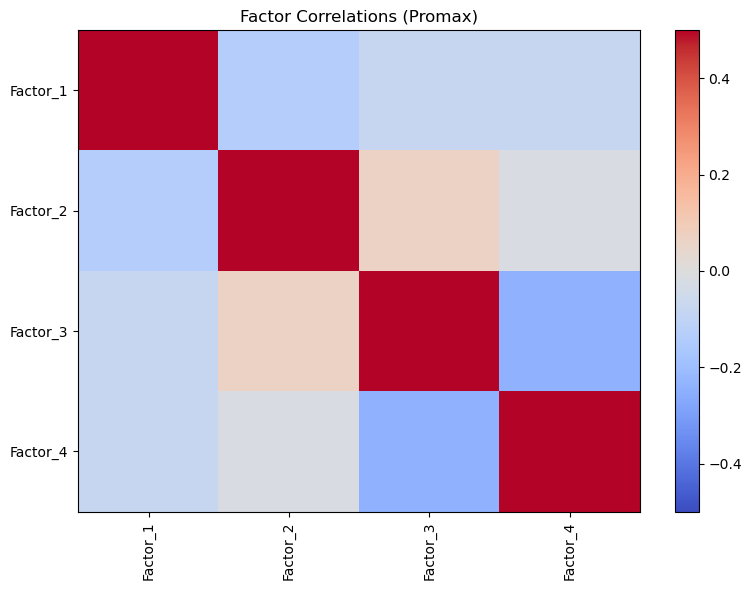

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, Rotator

# Prepare the data by excluding participant IDs
behavioral_data_cleaned = behavioral_transformed.drop(columns=["participant_id"], errors="ignore")

# Perform PAF with Oblique Rotation (Promax)
paf_analyzer_oblique = FactorAnalyzer(n_factors=4, rotation=None, method="principal")
paf_analyzer_oblique.fit(behavioral_data_cleaned)

# Apply Promax rotation manually using Rotator
rotator = Rotator(method="promax")
paf_oblique_loadings = rotator.fit_transform(paf_analyzer_oblique.loadings_)

# Compute the factor correlation matrix for Promax rotation
factor_correlation_matrix = np.corrcoef(paf_oblique_loadings.T)

# Convert results to DataFrames for readability
paf_oblique_loadings_df = pd.DataFrame(
    paf_oblique_loadings, columns=[f"Factor_{i+1}" for i in range(4)]
)
factor_correlation_matrix_df = pd.DataFrame(
    factor_correlation_matrix,
    columns=[f"Factor_{i+1}" for i in range(4)],
    index=[f"Factor_{i+1}" for i in range(4)],
)

# Perform PAF with Orthogonal Rotation (Varimax)
paf_analyzer_orthogonal = FactorAnalyzer(n_factors=4, rotation="varimax", method="principal")
paf_analyzer_orthogonal.fit(behavioral_data_cleaned)
paf_orthogonal_loadings_df = pd.DataFrame(
    paf_analyzer_orthogonal.loadings_, columns=[f"Factor_{i+1}" for i in range(4)]
)

# Display Factor Correlation Matrix for Promax
print("\nFactor Correlations (Promax):")
print(factor_correlation_matrix_df)

# Display the first 5 loadings for both methods
print("\nFirst 5 Loadings (Oblique - Promax):")
print(paf_oblique_loadings_df.head())

print("\nFirst 5 Loadings (Orthogonal - Varimax):")
print(paf_orthogonal_loadings_df.head())

# Variance explained by each factor
variance_explained_oblique = paf_analyzer_oblique.get_factor_variance()[1]
variance_explained_orthogonal = paf_analyzer_orthogonal.get_factor_variance()[1]

# Compare the total variance explained by both methods
variance_comparison_df = pd.DataFrame(
    {
        "Oblique (Promax)": variance_explained_oblique,
        "Orthogonal (Varimax)": variance_explained_orthogonal,
    },
    index=[f"Factor_{i+1}" for i in range(4)],
)

# Display Variance Explained Comparison
print("\nVariance Explained Comparison:")
print(variance_comparison_df)

# Optional: Visualize the Factor Correlation Matrix
def plot_heatmap(data, title, cmap="coolwarm"):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.imshow(data, cmap=cmap, aspect="auto", vmin=-0.5, vmax=0.5)  # Set color scale from -0.5 to 0.5)
    plt.colorbar()
    plt.xticks(range(data.shape[1]), data.columns, rotation=90)
    plt.yticks(range(data.shape[0]), data.index)
    plt.tight_layout()
    plt.savefig("plots/factor_correlation_matrix", dpi=300, bbox_inches='tight')  # Save at 300 DPI for high resolution
    plt.show()
    

plot_heatmap(factor_correlation_matrix_df, "Factor Correlations (Promax)")



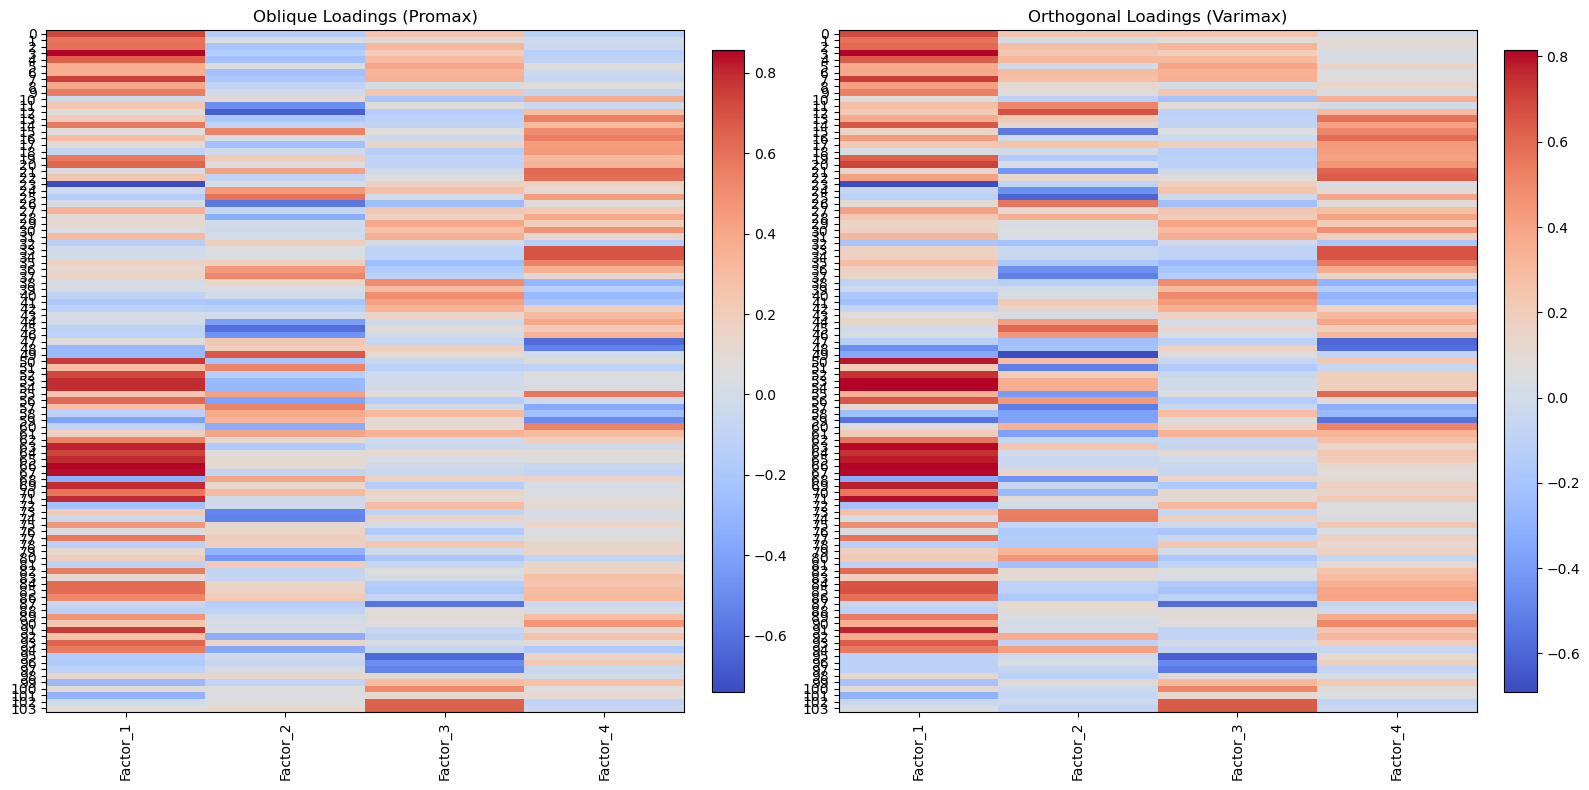

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Visualize Loadings for Both Methods Side by Side
def plot_side_by_side_heatmaps(data1, data2, title1, title2, cmap="coolwarm"):
    """Generates side-by-side heatmaps for comparing loadings."""
    fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 

    # Heatmap for the first dataset
    im1 = axes[0].imshow(data1, cmap=cmap, aspect="auto")
    axes[0].set_title(title1)
    axes[0].set_xticks(range(data1.shape[1]))
    axes[0].set_xticklabels(data1.columns, rotation=90)
    axes[0].set_yticks(range(data1.shape[0]))
    axes[0].set_yticklabels(data1.index)

    # Heatmap for the second dataset
    im2 = axes[1].imshow(data2, cmap=cmap, aspect="auto")
    axes[1].set_title(title2)
    axes[1].set_xticks(range(data2.shape[1]))
    axes[1].set_xticklabels(data2.columns, rotation=90)
    axes[1].set_yticks(range(data2.shape[0]))
    axes[1].set_yticklabels(data2.index)

    # Add a single colorbar for both heatmaps
    fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

# Call the function to plot both heatmaps side by side
plot_side_by_side_heatmaps(
    paf_oblique_loadings_df,
    paf_orthogonal_loadings,
    "Oblique Loadings (Promax)",
    "Orthogonal Loadings (Varimax)"
)


In [8]:
from scipy.stats import pearsonr

def congruence_coefficient(loadings1, loadings2):
    congruences = []
    for i in range(loadings1.shape[1]):
        r, _ = pearsonr(loadings1[:, i], loadings2[:, i])
        congruences.append(r)
    return congruences

promax_loadings = paf_oblique_loadings_df.values
varimax_loadings = paf_orthogonal_loadings.values

congruences = congruence_coefficient(promax_loadings, varimax_loadings)
print("Congruence Coefficients for Factors:", congruences)


Congruence Coefficients for Factors: [0.9787189171155618, -0.9940246081927735, 0.9963162949898918, 0.9645402379304998]


In [18]:
# Original column names and their corresponding new names
column_name_mapping = {
    'poms_tscore_ten_anx': 'POMS Tension Anxiety',
    'madrstot': 'MADRS Depression',
    'poms_tscore_dep_dej': 'POMS Depression Dejection',
    'dass_depr_sc': 'DASS Depression',
    'poms_tscore_fat_in': 'POMS Fatigue Inertia',
    'dass_stress_sc': 'DASS Stress',
    'pss_totalscore': 'PSS Perceived Stress',
    'staiy_state.1': 'STAIY Anxiety 1',
    'staiy_state': 'STAIY Anxiety',
    'rrs_tot_sum_score': 'RRS Ruminative Responses',
    'neo2_score_ne': 'NEO Neuroticism',
    'panss_gen_clean': 'PANNS general',
    'dass_anx_sc': 'DASS Anxiety',
    'bissc_total': 'BISBAS Inhibition Activation',
    'qvtot': 'Quality of Life',
    'cgi_tot': 'Clinical Global Impression',
    'mcas_total_clean': 'MCAS Community Ability',
    'rsri_fear_ill_score': 'RSRI Fear of Illness',
    'bis_fi': 'BIS Impulsiveness',
    'tci_ha_sum': 'TCI Harm Avoidance'
}

# Create a new DataFrame with adjusted column names
behavioral_data_cleaned.rename(columns=column_name_mapping, inplace=True)

# Display the first few rows to verify the column names
print(behavioral_data_cleaned.head())


   Clinical Global Impression  cssrs_isi     lrtot  MADRS Depression  \
0                    2.306113   1.574439  0.838158          0.916317   
1                    1.362318   1.305204  0.665134          1.155040   
2                    0.193322  -0.906832  0.933979          0.579854   
3                   -0.975673  -0.906832 -0.353535         -1.145704   
4                   -0.975673  -0.906832 -0.917004         -1.145704   

   MCAS Community Ability  panss_pos_clean  panss_neg_clean  PANNS general  \
0                1.242481         3.661830        -0.144071      -0.037318   
1                1.139560         0.154196        -0.615958       1.464987   
2                0.465285        -0.467185        -0.144071       0.699844   
3               -0.187457        -0.467185        -0.615958      -0.939532   
4                0.065752        -0.467185        -0.615958      -0.939532   

   pdss_tot  ymrs_tot  ...  shaps_total  tmb_dsm_score  tmb_choice_score  \
0 -0.318233  -0.59355 

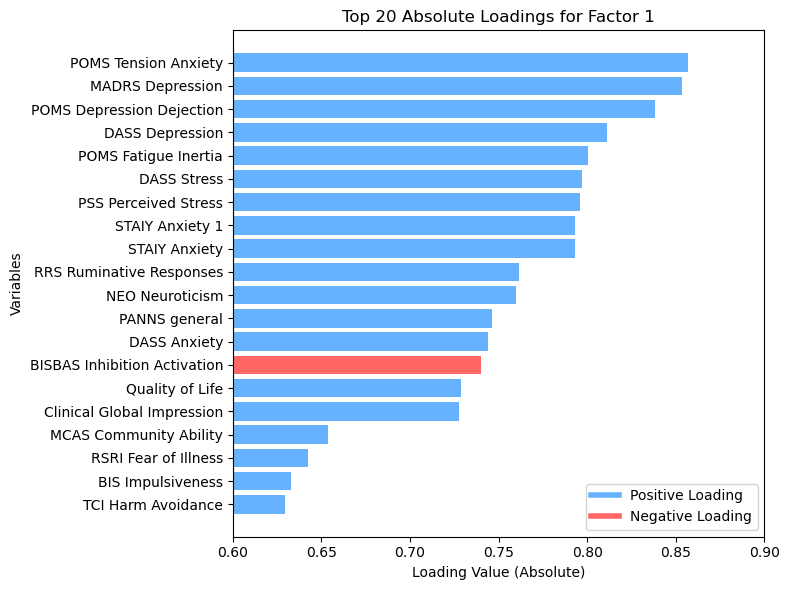

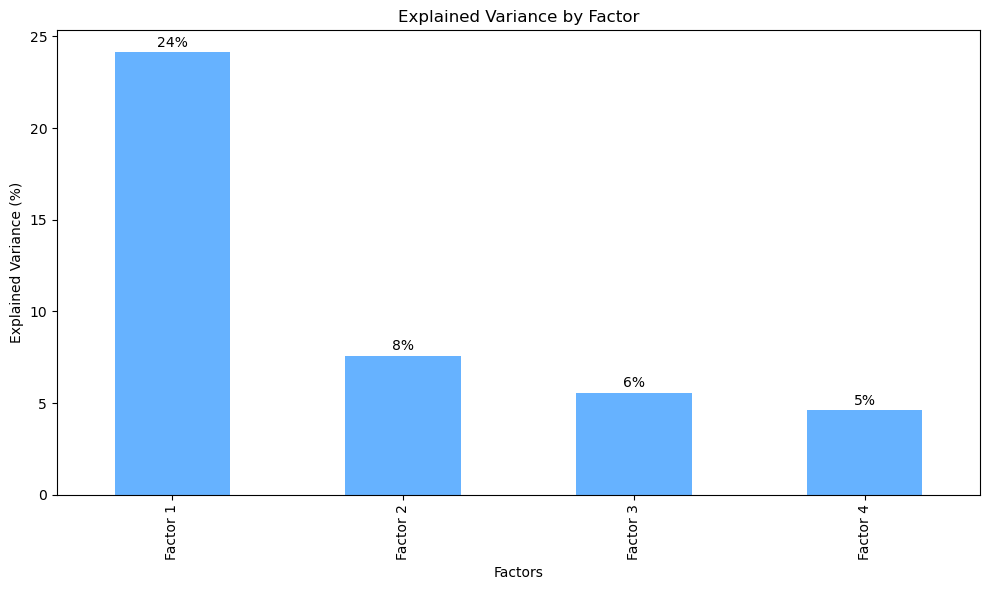

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute explained variance for Promax rotation
explained_variance_oblique = paf_analyzer_oblique.get_factor_variance()[1]  # Variance explained

# Create DataFrame for explained variance
explained_variance_df = pd.DataFrame({
    "Explained Variance (%)": explained_variance_oblique
}, index=[f"Factor {i+1}" for i in range(len(explained_variance_oblique))])

# Extract the 20 largest absolute loadings for the first factor
def get_top_loadings_for_factor(loadings_df, factor_name, top_n=20):
    """
    Extracts the top N highest loadings (positive and negative) for a specific factor.
    """
    factor_loadings = loadings_df[factor_name]
    # Sort by absolute value, select the top N
    sorted_loadings = factor_loadings.abs().sort_values(ascending=False).head(top_n)
    # Retain original signs
    return factor_loadings[sorted_loadings.index]

# Select top20 loadings
top_loadings_factor1 = get_top_loadings_for_factor(paf_oblique_loadings_df, "Factor_1", top_n=20)

# Bar chart visualization for top 20 loadings of Factor 1
def plot_top_loadings(loadings, factor_name, variable_names):
    """
    Plots the top absolute loadings for a specific factor as a horizontal bar chart.
    Positive and negative loadings are visualized in the same direction, with a legend indicating the sign.
    """
    plt.figure(figsize=(8, 6))
    labels = loadings.index
    # Use absolute values for plotting
    absolute_values = loadings.abs().values
    # Assign colors based on the sign of the original loadings
    colors = ['#66B2FF' if v > 0 else '#FF6666' for v in loadings.values]  # Blue for positive, red for negative
    
    # Map variable names for interpretability
    variable_labels = [variable_names[idx] for idx in labels]

    # Create bar chart
    plt.barh(variable_labels, absolute_values, color=colors)
    plt.xlabel("Loading Value (Absolute)")
    plt.xlim(0.6,0.9)
    plt.ylabel("Variables")
    plt.title(f"Top 20 Absolute Loadings for Factor 1")
    plt.gca().invert_yaxis()  # Flip the y-axis for better readability
    
    # Add legend to indicate positive and negative loadings
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='#66B2FF', lw=4, label='Positive Loading'),
        Line2D([0], [0], color='#FF6666', lw=4, label='Negative Loading')
    ]
    plt.legend(handles=legend_elements, loc='best')
    
    # Save plot in high resolution
    plt.tight_layout()
    # plt.savefig(f"plots/factor_1_20loadings", dpi=300, bbox_inches='tight')  # Save at 300 DPI
    plt.show()


# Provide variable names from the dataset for interpretability
variable_names = list(behavioral_data_cleaned.columns)

# Plot top 20 loadings for Factor 1
plot_top_loadings(top_loadings_factor1, "Factor_1", variable_names)

# Bar chart visualization for explained variance
def plot_explained_variance(explained_variance_df):
    """
    Plots the explained variance for each factor, ensuring values are displayed as percentages.
    """
    # Convert explained variance to percentages
    explained_variance_df["Explained Variance (%)"] *= 100

    # Plot the explained variance
    explained_variance_df.plot(kind="bar", figsize=(10, 6), legend=False, color="#66B2FF")
    plt.title("Explained Variance by Factor")
    plt.ylabel("Explained Variance (%)")
    plt.xlabel("Factors")
    # Add annotations for rounded explained variance values
    for idx, value in enumerate(explained_variance_df["Explained Variance (%)"]):
        plt.text(
            idx, value + 0.15,  # Minimal distance above the bar
            f"{int(round(value, 0))}%",  # Display as rounded integer with a '%' sign
            ha="center", va="bottom", fontsize=10
        )
    plt.tight_layout()
    plt.savefig("plots/factor_explained_variance", dpi=300, bbox_inches='tight')  # Save at 300 DPI for high resolution
    plt.show()
# Plot explained variance for Promax rotation
plot_explained_variance(explained_variance_df)


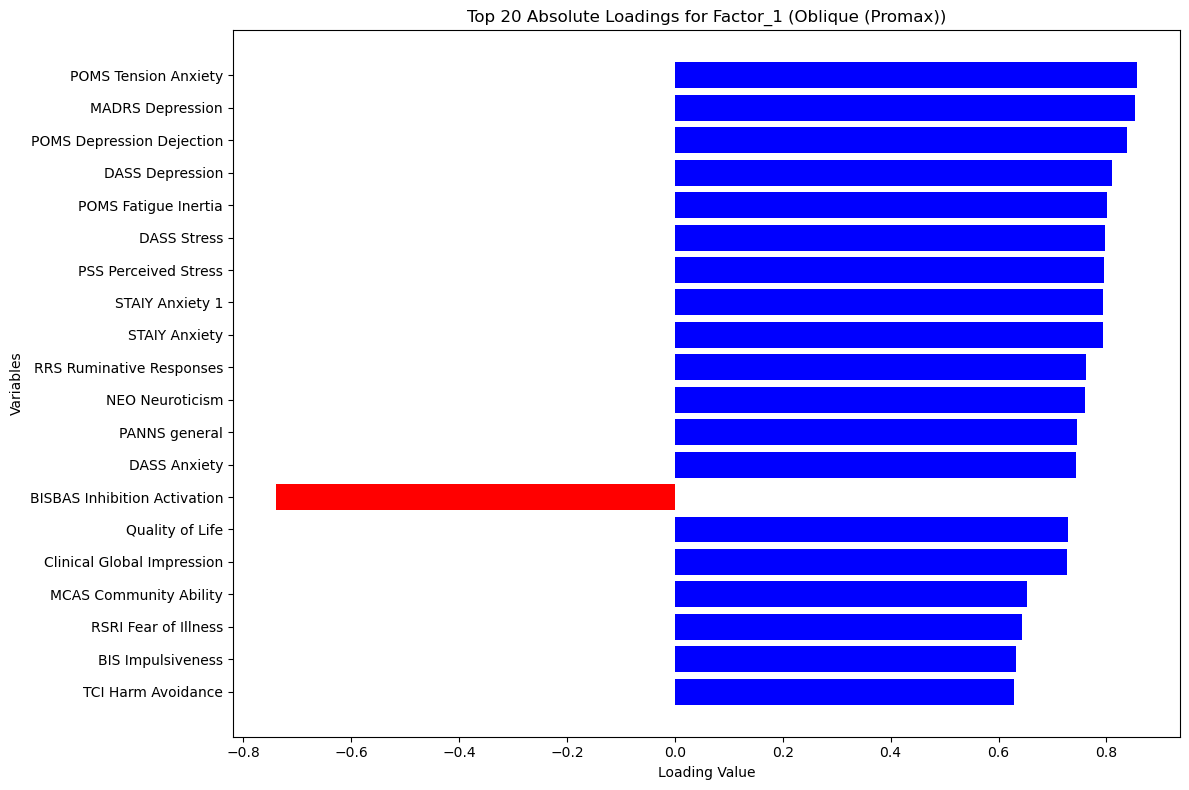

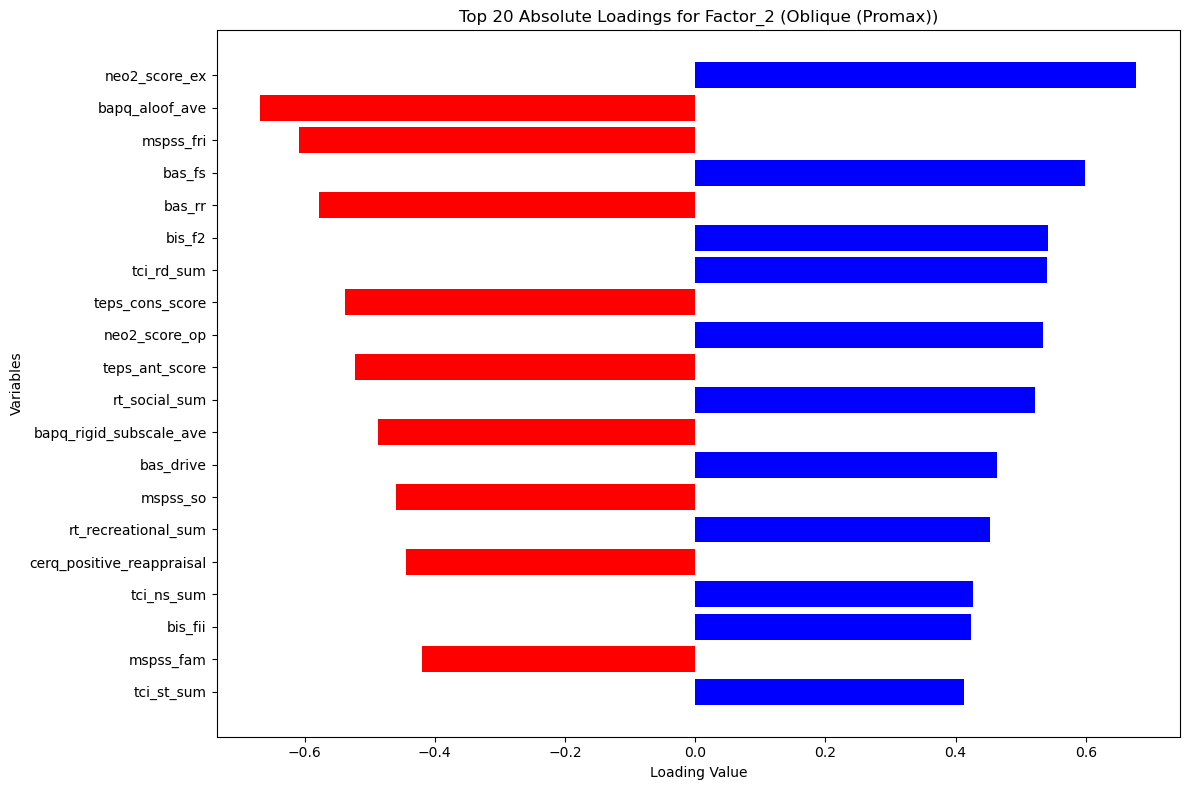

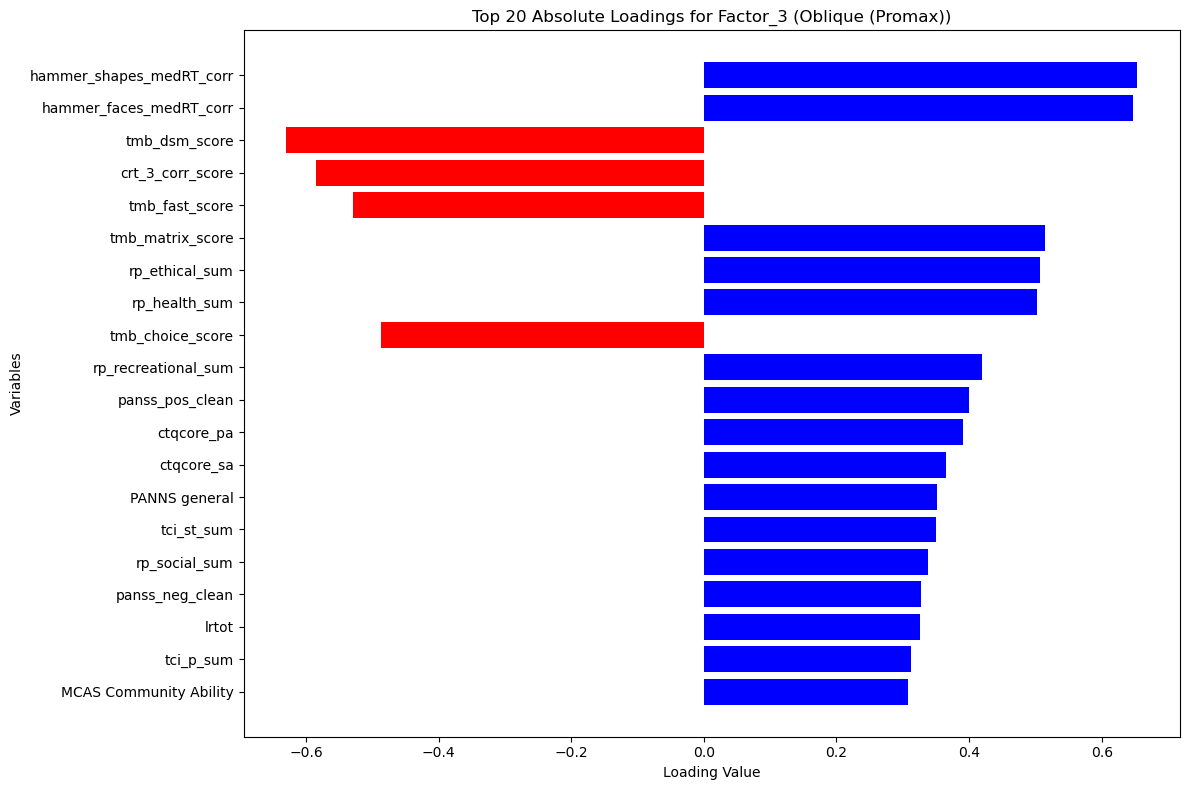

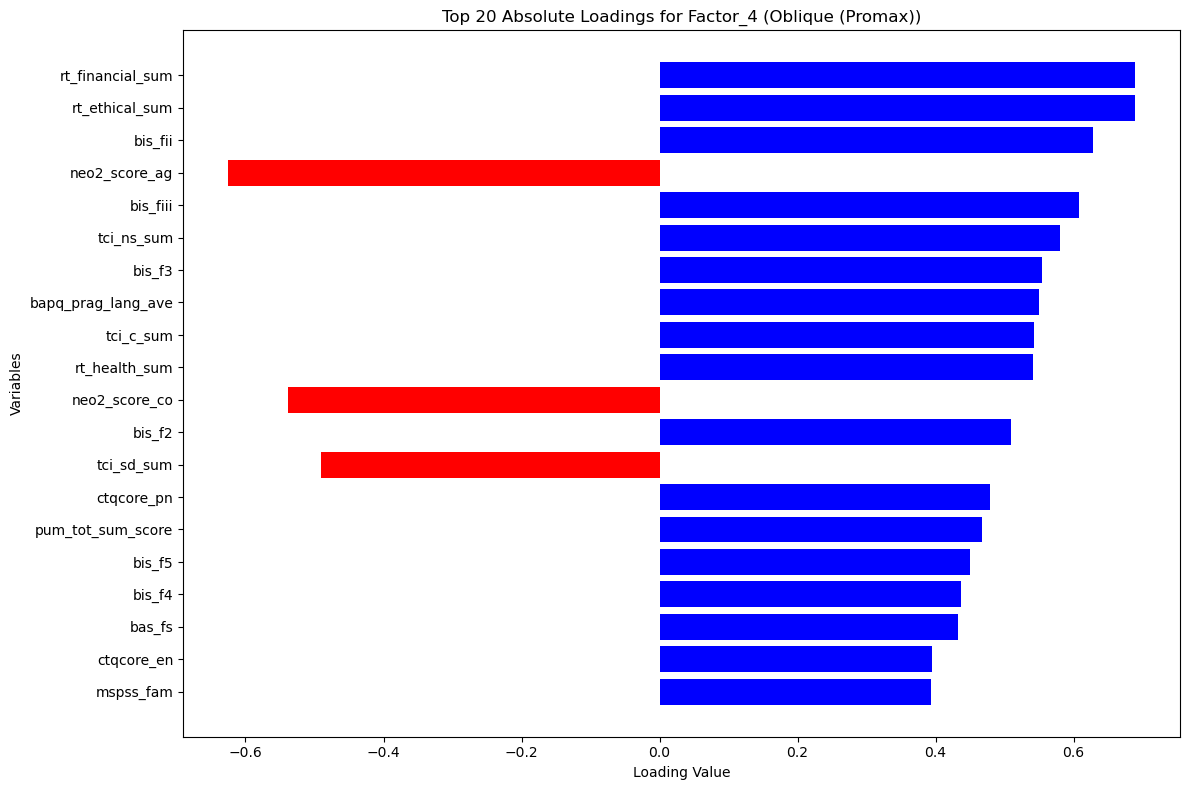

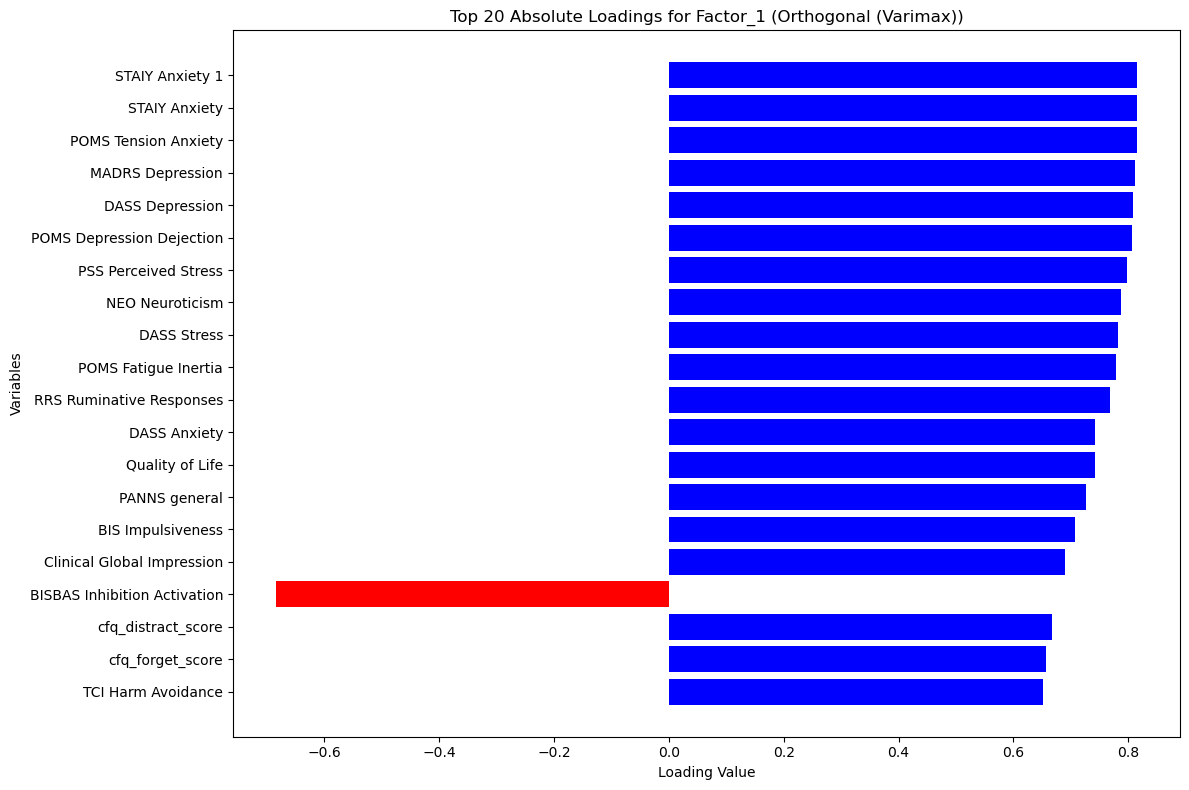

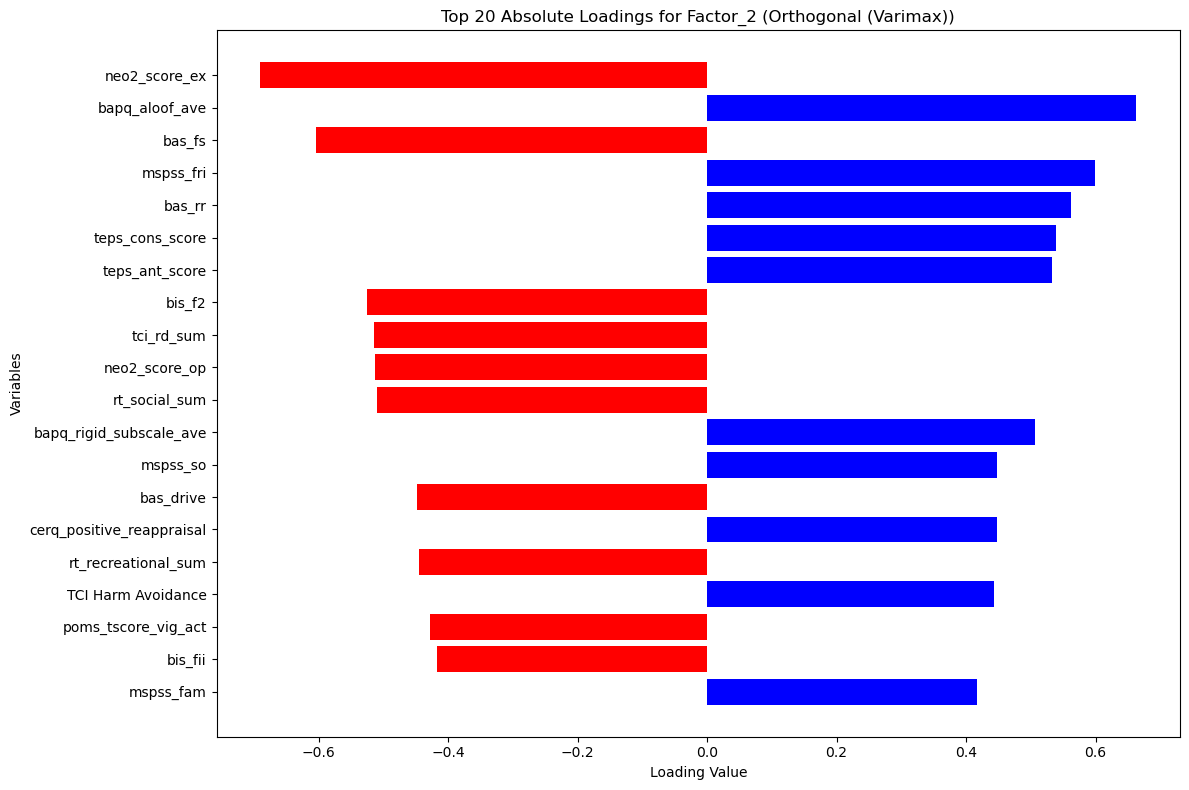

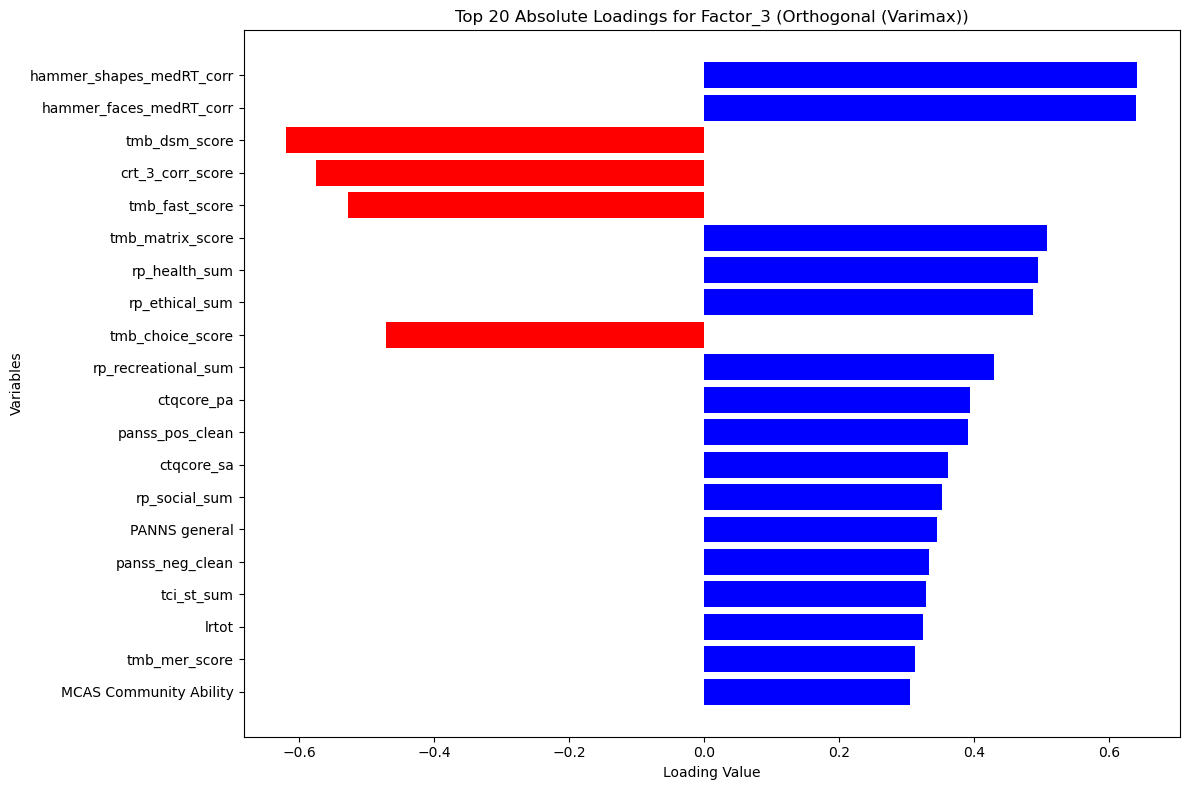

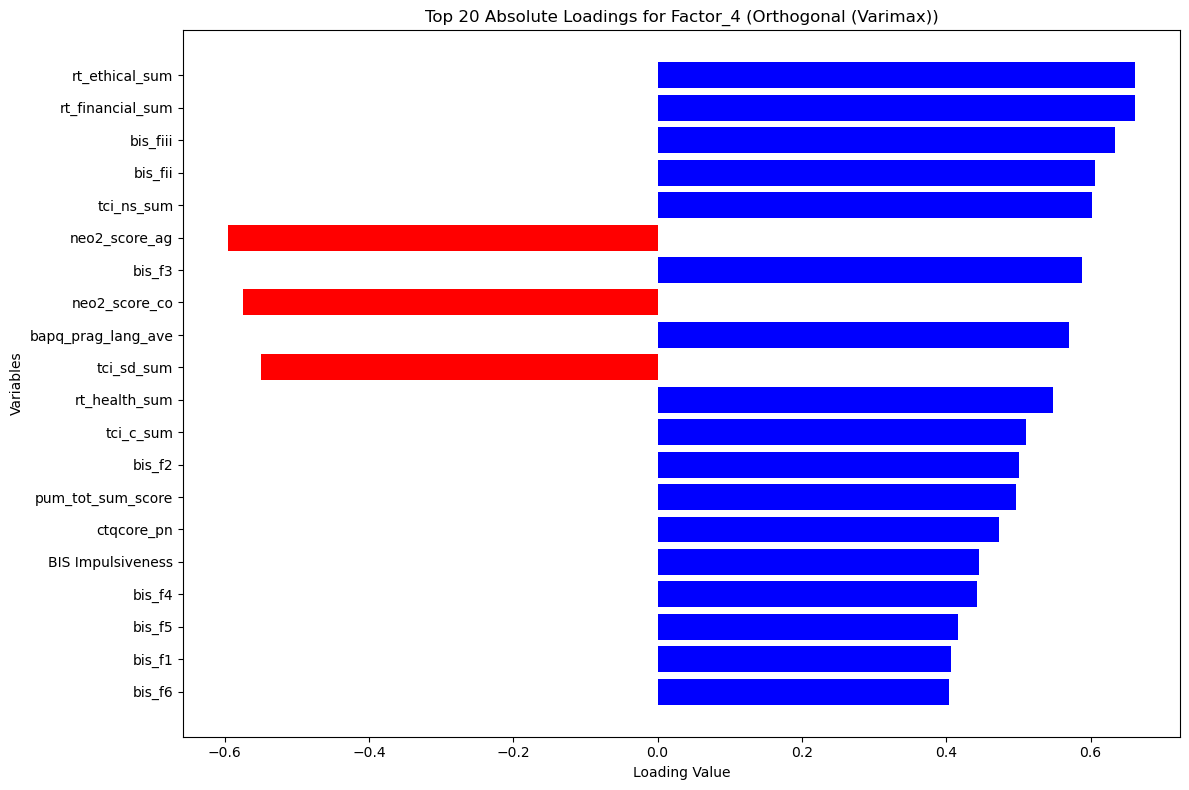

Explained Variance (%):
          Oblique (Promax)  Orthogonal (Varimax)
Factor_1          0.241221              0.192955
Factor_2          0.075876              0.080211
Factor_3          0.055401              0.055590
Factor_4          0.046020              0.089762


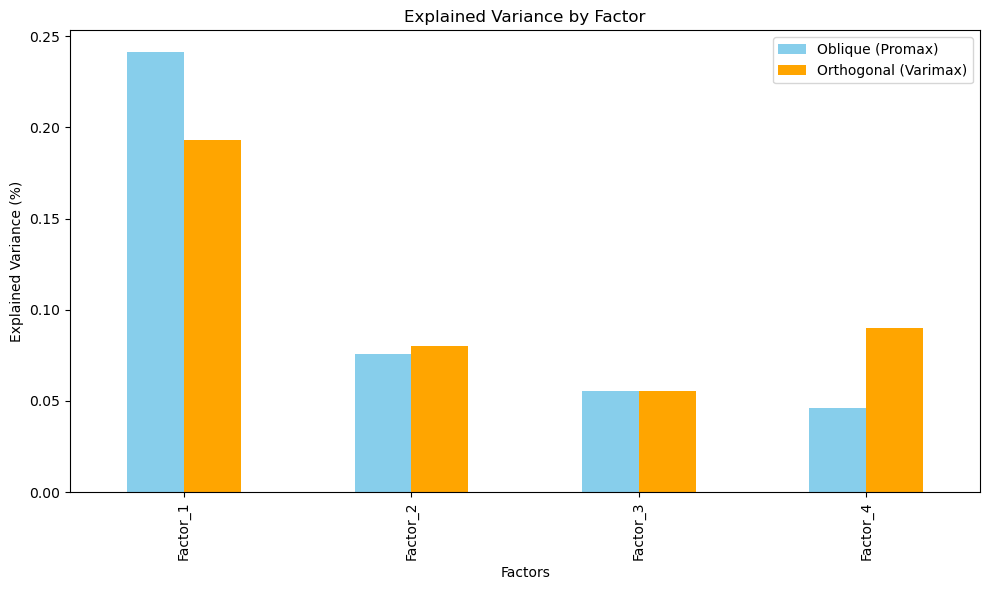

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute explained variance for both methods
explained_variance_oblique = paf_analyzer_oblique.get_factor_variance()[1]  # Variance explained
explained_variance_orthogonal = paf_analyzer_orthogonal.get_factor_variance()[1]

# Create DataFrame for explained variance comparison
explained_variance_df = pd.DataFrame({
    "Oblique (Promax)": explained_variance_oblique,
    "Orthogonal (Varimax)": explained_variance_orthogonal
}, index=[f"Factor_{i+1}" for i in range(len(explained_variance_oblique))])

# Identify 20 largest absolute loadings per factor for both methods
def get_top_absolute_loadings(loadings_df, top_n=20):
    top_loadings = {}
    for factor in loadings_df.columns:
        # Sort by absolute value and select the top N
        sorted_loadings = loadings_df[factor].abs().sort_values(ascending=False).head(top_n)
        # Retain original signs
        top_loadings[factor] = loadings_df[factor][sorted_loadings.index]
    return top_loadings

# Top absolute loadings for Oblique
top_loadings_oblique = get_top_absolute_loadings(paf_oblique_loadings_df)

# Top absolute loadings for Orthogonal
top_loadings_orthogonal = get_top_absolute_loadings(paf_orthogonal_loadings)

# Bar chart visualization for top absolute loadings
def plot_top_absolute_loadings(top_loadings, method_name, variable_names):
    for factor, loadings in top_loadings.items():
        plt.figure(figsize=(12, 8))
        # Prepare data for plotting
        labels = loadings.index
        values = loadings.values
        colors = ['blue' if v > 0 else 'red' for v in values]  # Blue for positive, red for negative
        
        # Variable names as y-axis labels
        variable_labels = [variable_names[idx] for idx in labels]

        # Create bar chart
        plt.barh(variable_labels, values, color=colors)
        plt.xlabel("Loading Value")
        plt.ylabel("Variables")
        plt.title(f"Top 20 Absolute Loadings for {factor} ({method_name})")
        plt.gca().invert_yaxis()  # Flip the y-axis for better readability
        plt.tight_layout()
        plt.show()

# Provide variable names from the dataset for interpretability
variable_names = list(behavioral_data_cleaned.columns)

# Plot for Oblique
plot_top_absolute_loadings(top_loadings_oblique, "Oblique (Promax)", variable_names)

# Plot for Orthogonal
plot_top_absolute_loadings(top_loadings_orthogonal, "Orthogonal (Varimax)", variable_names)

# Display explained variance
print("Explained Variance (%):")
print(explained_variance_df)

# Optional: Visualize explained variance comparison as a bar chart
explained_variance_df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Explained Variance by Factor")
plt.ylabel("Explained Variance (%)")
plt.xlabel("Factors")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


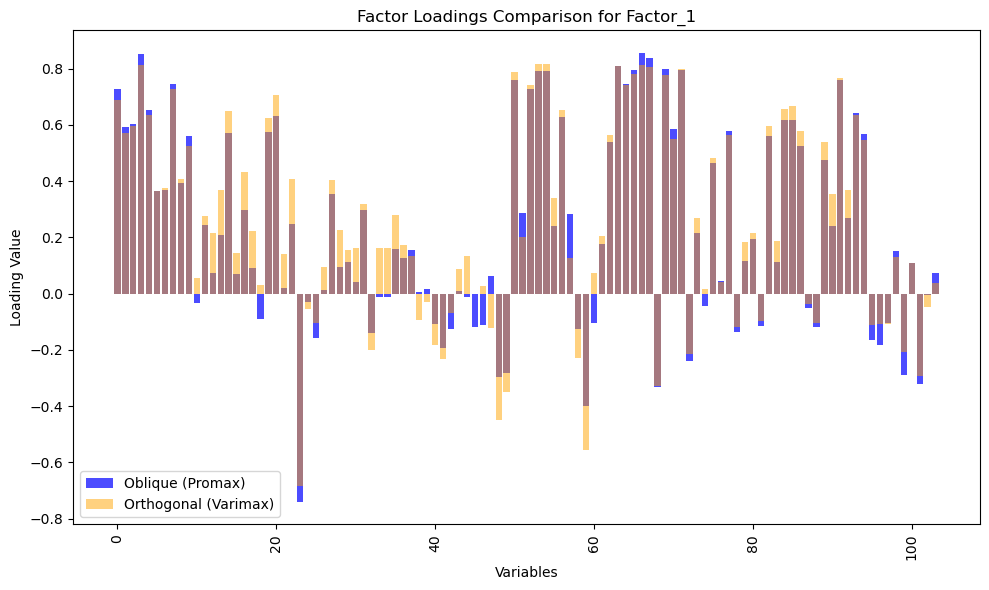

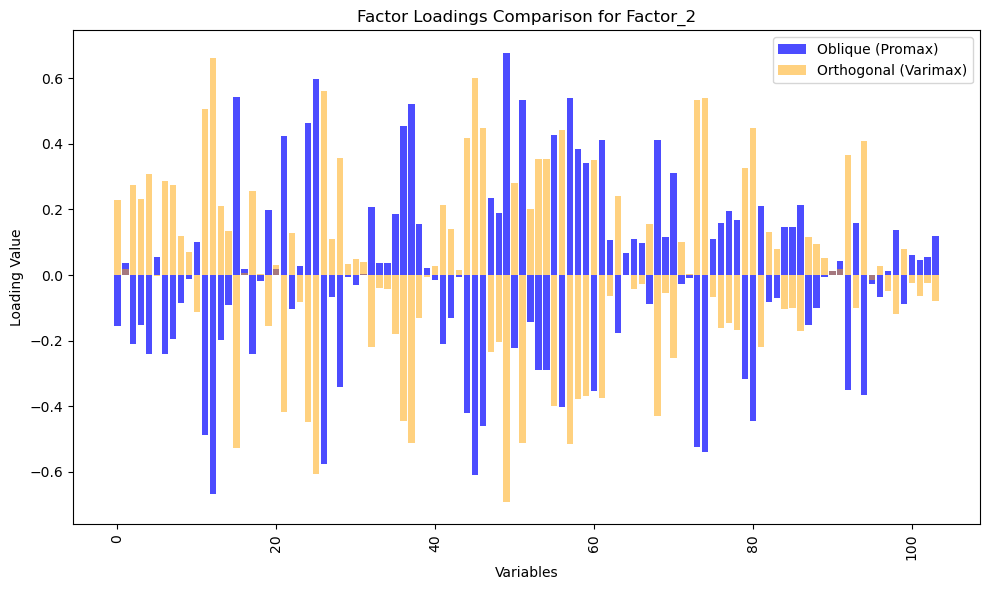

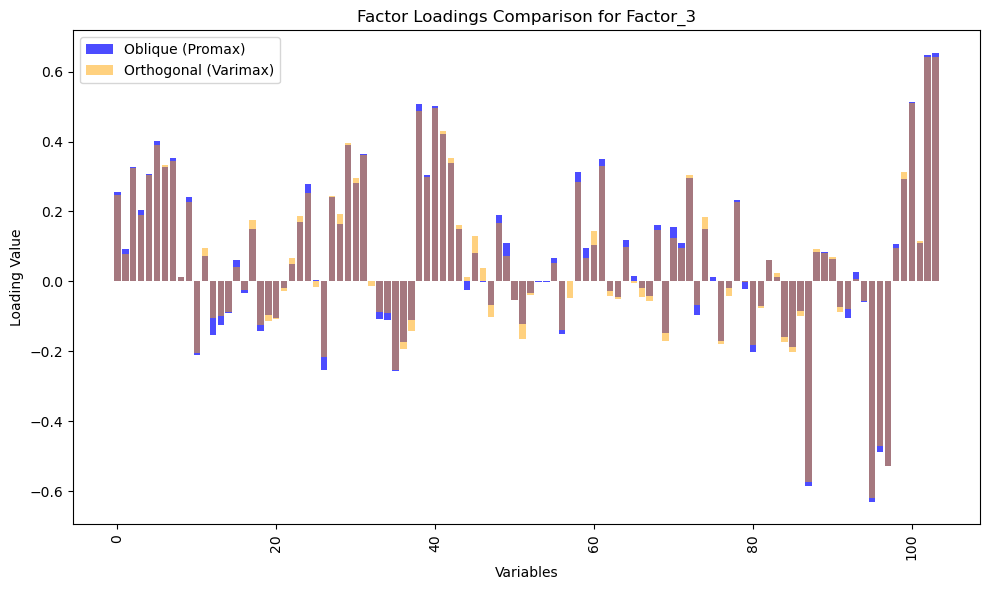

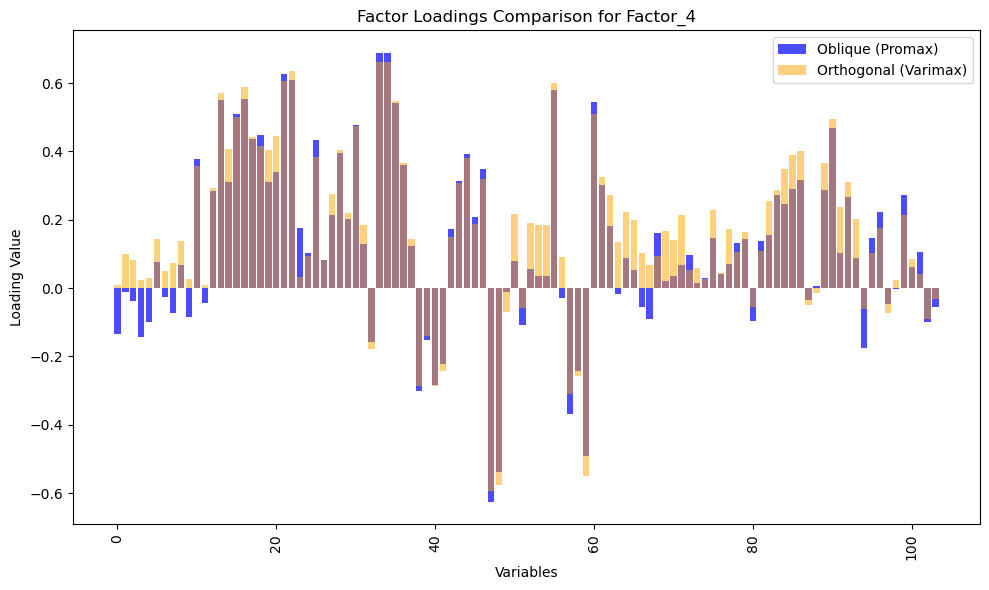

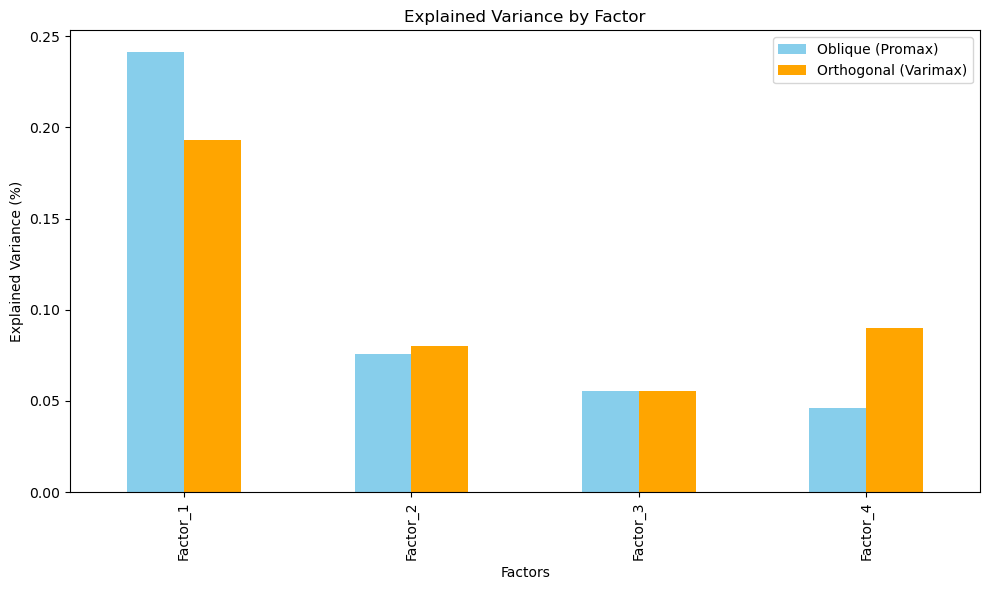

Explained Variance (%):
          Oblique (Promax)  Orthogonal (Varimax)
Factor_1          0.241221              0.192955
Factor_2          0.075876              0.080211
Factor_3          0.055401              0.055590
Factor_4          0.046020              0.089762

Congruence Coefficients:
Factor_1: 0.979
Factor_2: -0.994
Factor_3: 0.996
Factor_4: 0.965

Factor Score Correlations Between Promax and Varimax:
Factor_1    0.506989
Factor_2   -0.107376
Factor_3    0.145695
Factor_4    0.231964
dtype: float64


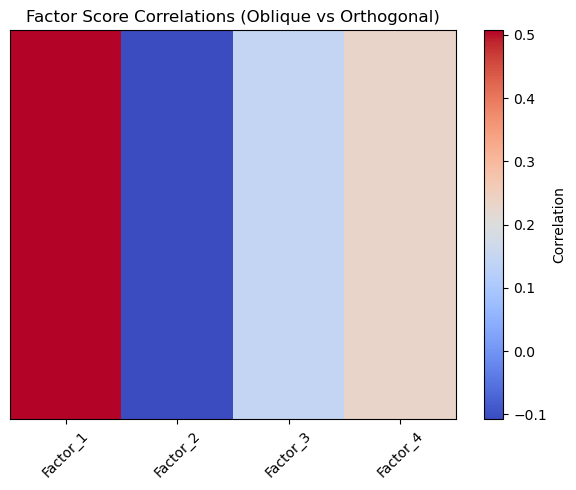

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Compute explained variance for both methods
explained_variance_oblique = paf_analyzer_oblique.get_factor_variance()[1]
explained_variance_orthogonal = paf_analyzer_orthogonal.get_factor_variance()[1]

# Create a DataFrame for explained variance comparison
explained_variance_df = pd.DataFrame({
    "Oblique (Promax)": explained_variance_oblique,
    "Orthogonal (Varimax)": explained_variance_orthogonal
}, index=[f"Factor_{i+1}" for i in range(len(explained_variance_oblique))])

# Congruence coefficient function
def congruence_coefficient(loadings1, loadings2):
    congruences = []
    for i in range(loadings1.shape[1]):
        r, _ = pearsonr(loadings1[:, i], loadings2[:, i])
        congruences.append(r)
    return congruences

# Compute congruence coefficients between Promax and Varimax loadings
promax_loadings = paf_oblique_loadings_df.values
varimax_loadings = paf_orthogonal_loadings.values
congruences = congruence_coefficient(promax_loadings, varimax_loadings)

# Compute correlations between factor scores
factor_scores_oblique = pd.DataFrame(paf_analyzer_oblique.transform(behavioral_data_cleaned), columns=[f"Factor_{i+1}" for i in range(4)])
factor_scores_orthogonal = pd.DataFrame(paf_analyzer_orthogonal.transform(behavioral_data_cleaned), columns=[f"Factor_{i+1}" for i in range(4)])
score_correlations = factor_scores_oblique.corrwith(factor_scores_orthogonal, axis=0)

# Visualize loadings for both methods
def plot_loadings_comparison(oblique_df, orthogonal_df):
    for factor in oblique_df.columns:
        plt.figure(figsize=(10, 6))
        plt.bar(oblique_df.index, oblique_df[factor], color='blue', alpha=0.7, label="Oblique (Promax)")
        plt.bar(orthogonal_df.index, orthogonal_df[factor], color='orange', alpha=0.5, label="Orthogonal (Varimax)")
        plt.title(f"Factor Loadings Comparison for {factor}")
        plt.ylabel("Loading Value")
        plt.xlabel("Variables")
        plt.xticks(rotation=90)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Plot factor loadings
plot_loadings_comparison(paf_oblique_loadings_df, paf_orthogonal_loadings)

# Visualize explained variance comparison
explained_variance_df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Explained Variance by Factor")
plt.ylabel("Explained Variance (%)")
plt.xlabel("Factors")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Print comparisons
print("Explained Variance (%):")
print(explained_variance_df)

print("\nCongruence Coefficients:")
for i, coeff in enumerate(congruences):
    print(f"Factor_{i+1}: {coeff:.3f}")

print("\nFactor Score Correlations Between Promax and Varimax:")
print(score_correlations)

# Heatmap for Factor Score Correlations
plt.figure(figsize=(6, 5))
plt.title("Factor Score Correlations (Oblique vs Orthogonal)")
plt.imshow(score_correlations.values.reshape(1, -1), cmap="coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(score_correlations)), score_correlations.index, rotation=45)
plt.yticks([])
plt.tight_layout()
plt.show()


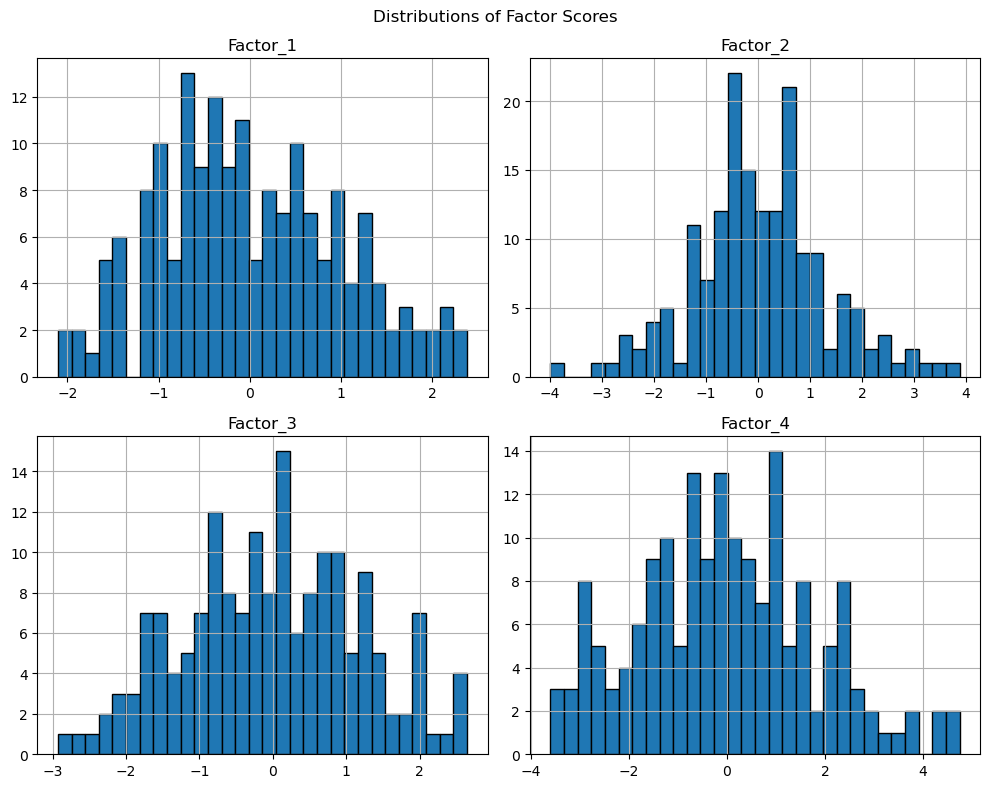

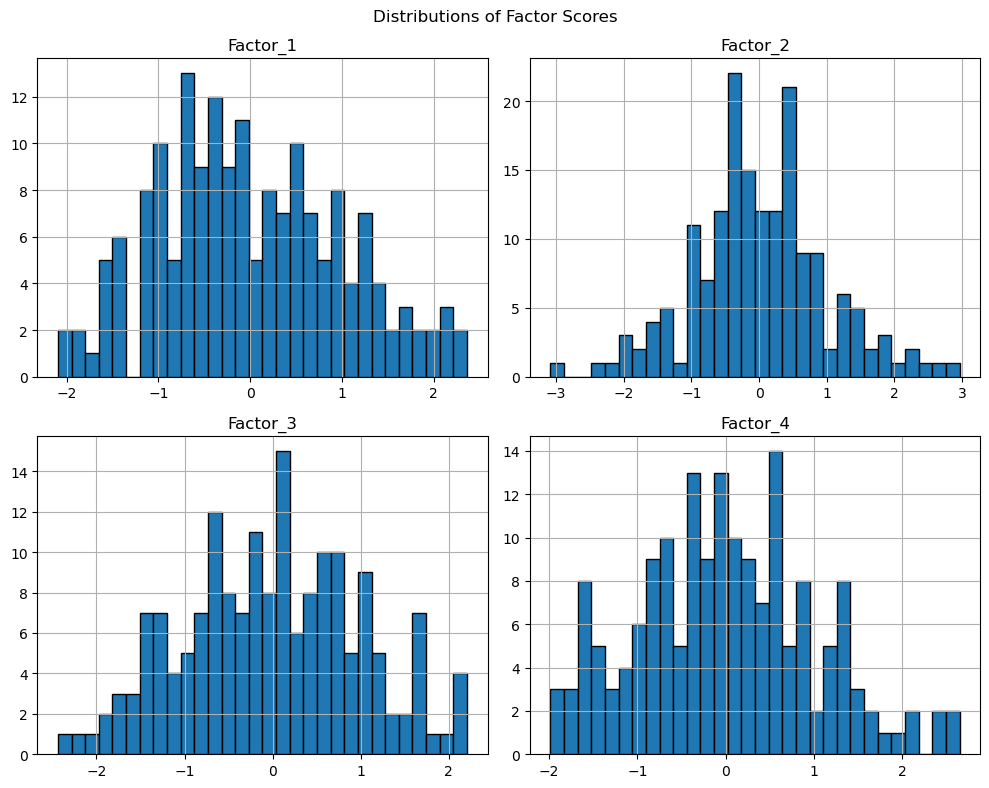

Descriptive Statistics for Original Factor Scores:
         Factor_1    Factor_2    Factor_3    Factor_4
count  172.000000  172.000000  172.000000  172.000000
mean     0.003229    0.018756   -0.002897   -0.024285
std      1.009384    1.306328    1.203636    1.804858
min     -2.104284   -3.996106   -2.926976   -3.596535
25%     -0.697606   -0.716457   -0.844558   -1.233034
50%     -0.125191    0.016383   -0.007869   -0.035024
75%      0.717193    0.698020    0.844414    1.119514
max      2.379347    3.875711    2.644145    4.740283

Descriptive Statistics for Standardized Factor Scores:
           Factor_1      Factor_2      Factor_3      Factor_4
count  1.720000e+02  1.720000e+02  1.720000e+02  1.720000e+02
mean  -9.294890e-17 -6.196594e-17  2.065531e-17 -1.032766e-17
std    1.002920e+00  1.002920e+00  1.002920e+00  1.002920e+00
min   -2.094016e+00 -3.082368e+00 -2.436465e+00 -1.985020e+00
25%   -6.963467e-01 -5.644514e-01 -7.013074e-01 -6.716747e-01
50%   -1.275976e-01 -1.821822e-03 -

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming `behavioral_data_cleaned` is your dataset and `paf_analyzer_oblique` is your fitted factor analyzer

# Step 1: Compute Factor Scores
# The `transform` method computes the factor scores for each participant
factor_scores = paf_analyzer_oblique.transform(behavioral_data_cleaned)

# Convert to a DataFrame for readability
factor_scores_df = pd.DataFrame(
    factor_scores, 
    columns=[f"Factor_{i+1}" for i in range(factor_scores.shape[1])]
)

# Step 2: Check Distributions of Factor Scores
def plot_distributions(df):
    """Plot histograms of factor scores to check distributions."""
    df.hist(bins=30, figsize=(10, 8), edgecolor='black')
    plt.suptitle("Distributions of Factor Scores")
    plt.tight_layout()
    plt.show()

plot_distributions(factor_scores_df)

# Step 3: Standardize Factor Scores (if needed)
# Standardizing scores for models sensitive to scale (e.g., SVMs)
scaler = StandardScaler()
standardized_factor_scores = scaler.fit_transform(factor_scores_df)

# Convert standardized scores to DataFrame
standardized_factor_scores_df = pd.DataFrame(
    standardized_factor_scores, 
    columns=factor_scores_df.columns
)

# Step 4: Check Standardized Distributions
plot_distributions(standardized_factor_scores_df)

# Save standardized factor scores for ML modeling
standardized_factor_scores_df.to_csv("standardized_factor_scores.csv", index=False)

# Step 5: Display Descriptive Statistics
print("Descriptive Statistics for Original Factor Scores:")
print(factor_scores_df.describe())

print("\nDescriptive Statistics for Standardized Factor Scores:")
print(standardized_factor_scores_df.describe())


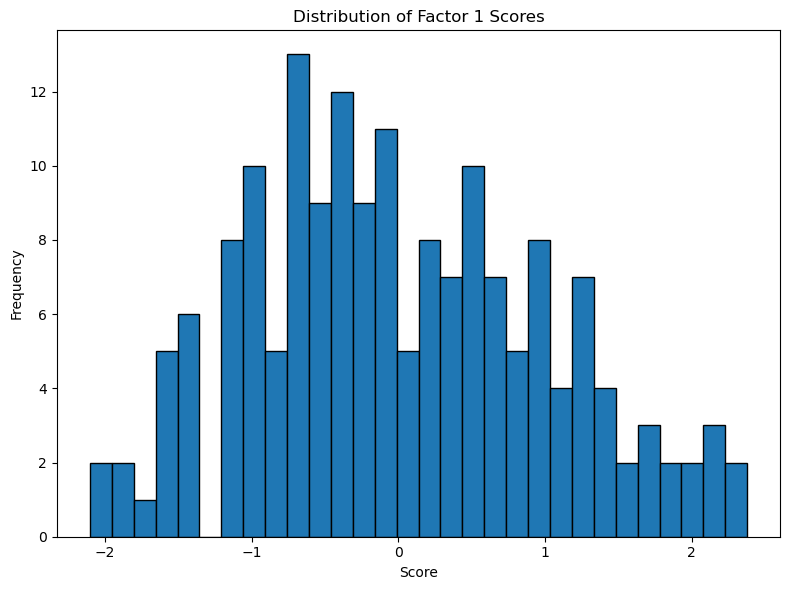

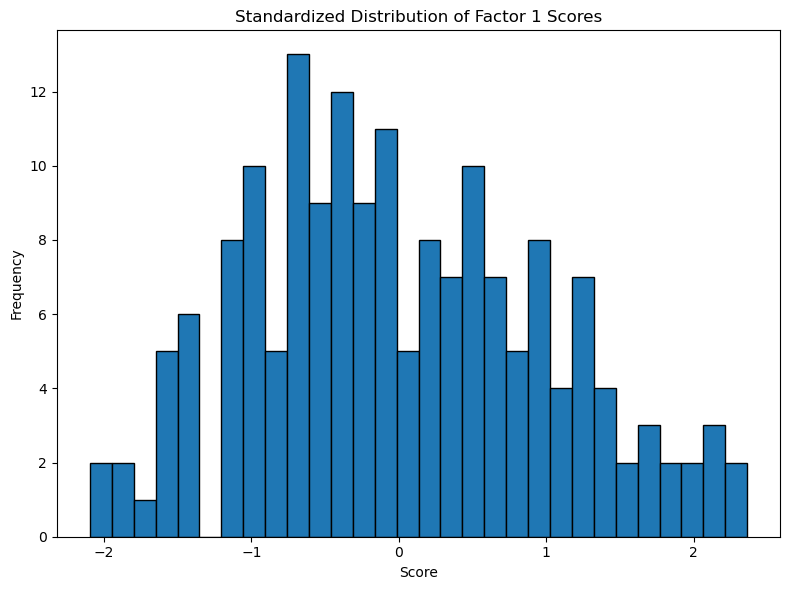

Descriptive Statistics for Factor 1 (Original):
count    172.000000
mean       0.003229
std        1.009384
min       -2.104284
25%       -0.697606
50%       -0.125191
75%        0.717193
max        2.379347
Name: Factor_1, dtype: float64

Descriptive Statistics for Factor 1 (Standardized):
       Standardized_Factor_1
count           1.720000e+02
mean            3.098297e-17
std             1.002920e+00
min            -2.094016e+00
25%            -6.963467e-01
50%            -1.275976e-01
75%             7.093909e-01
max             2.360900e+00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming `behavioral_data_cleaned` is your dataset and `paf_analyzer_oblique` is your fitted factor analyzer

# Step 1: Compute Factor Scores
# The `transform` method computes the factor scores for each participant
factor_scores = paf_analyzer_oblique.transform(behavioral_data_cleaned)

# Convert to a DataFrame for readability
factor_scores_df = pd.DataFrame(
    factor_scores, 
    columns=[f"Factor_{i+1}" for i in range(factor_scores.shape[1])]
)

# Focus only on Factor 1
factor_1_scores = factor_scores_df["Factor_1"]

# Step 2: Check Distributions of Factor 1 Scores
def plot_distribution(data, title):
    """Plot histogram of a single factor score to check distribution."""
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(title)
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_distribution(factor_1_scores, "Distribution of Factor 1 Scores")

# Step 3: Standardize Factor 1 Scores
# Standardizing scores for models sensitive to scale (e.g., SVMs)
scaler = StandardScaler()
standardized_factor_1_scores = scaler.fit_transform(factor_1_scores.values.reshape(-1, 1))

# Convert standardized scores to DataFrame
standardized_factor_1_df = pd.DataFrame(
    standardized_factor_1_scores, 
    columns=["Standardized_Factor_1"]
)

# Step 4: Check Standardized Distribution
plot_distribution(standardized_factor_1_df["Standardized_Factor_1"], "Standardized Distribution of Factor 1 Scores")

# Don't Save standardized Factor 1 scores for ML modeling
# standardized_factor_1_df.to_csv("standardized_factor_1_scores.csv", index=False)

# Step 5: Display Descriptive Statistics
print("Descriptive Statistics for Factor 1 (Original):")
print(factor_1_scores.describe())

print("\nDescriptive Statistics for Factor 1 (Standardized):")
print(standardized_factor_1_df.describe())


In [13]:
from scipy.stats import skew

# Compute skewness for Factor 1
factor_1_skewness = skew(factor_1_scores)

factor_1_skewness

# 0.241 is very acceptable


0.24176599965743187

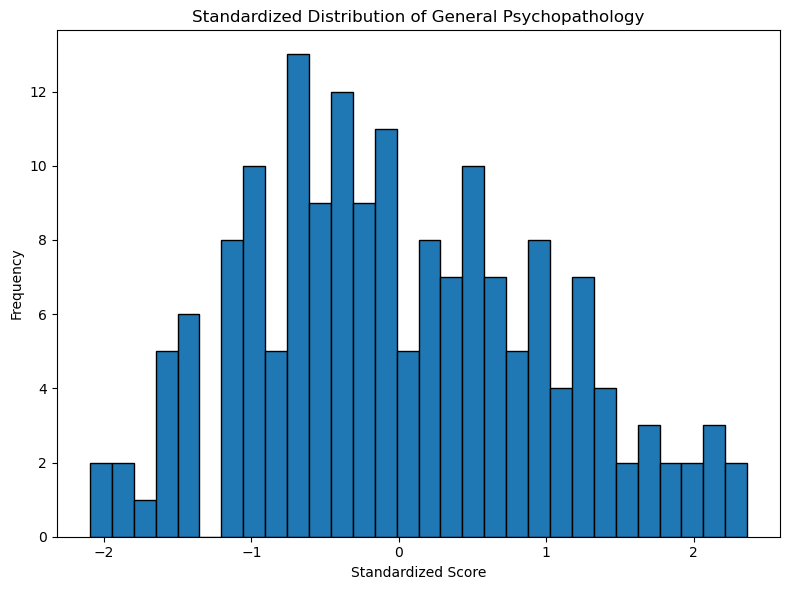

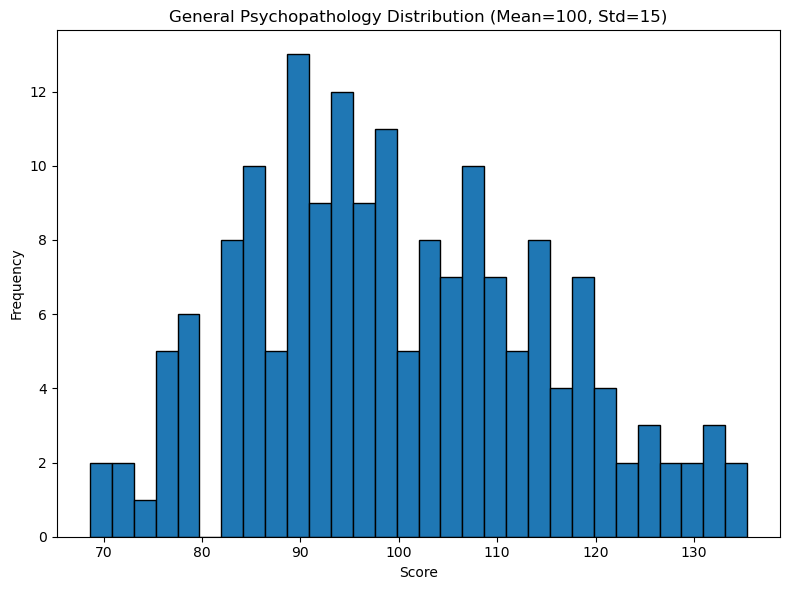

Descriptive Statistics for Original General Psychopathology Scores:
count    172.000000
mean       0.003229
std        1.009384
min       -2.104284
25%       -0.697606
50%       -0.125191
75%        0.717193
max        2.379347
dtype: float64

Descriptive Statistics for Standardized General Psychopathology Scores:
       General_Psychopathology_Standardized
count                          1.720000e+02
mean                           3.098297e-17
std                            1.002920e+00
min                           -2.094016e+00
25%                           -6.963467e-01
50%                           -1.275976e-01
75%                            7.093909e-01
max                            2.360900e+00

Descriptive Statistics for Transformed General Psychopathology Scores:
       General_Psychopathology
count               172.000000
mean                100.000000
std                  15.043796
min                  68.589766
25%                  89.554799
50%                  98.086036

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming `factor_1_scores` is a Pandas Series or NumPy array
# If it’s not, ensure it's converted appropriately before proceeding

# Step 1: Verify `factor_1_scores` is correctly formatted
if isinstance(factor_1_scores, pd.Series):
    factor_1_values = factor_1_scores.values  # Convert to NumPy array if it's a Pandas Series
else:
    factor_1_values = factor_1_scores  # Assume it's already a NumPy array or compatible format

# Step 2: Standardize Factor 1 Scores (just for visualization)
scaler = StandardScaler()
general_psychopathology_standardized = scaler.fit_transform(factor_1_values.reshape(-1, 1))

# Convert standardized scores to DataFrame for visualization
general_psychopathology_standardized_df = pd.DataFrame(
    general_psychopathology_standardized, columns=["General_Psychopathology_Standardized"]
)

# Plot the standardized distribution
plt.figure(figsize=(8, 6))
plt.hist(general_psychopathology_standardized_df["General_Psychopathology_Standardized"], bins=30, edgecolor='black')
plt.title("Standardized Distribution of General Psychopathology")
plt.xlabel("Standardized Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 3: Transform Factor 1 Scores to Mean=100, Std=15
general_psychopathology_transformed = (factor_1_values - np.mean(factor_1_values)) / np.std(factor_1_values) * 15 + 100

# Convert transformed scores to DataFrame
general_psychopathology_df = pd.DataFrame(general_psychopathology_transformed, columns=["General_Psychopathology"])

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
plt.hist(general_psychopathology_df["General_Psychopathology"], bins=30, edgecolor='black')
plt.title("General Psychopathology Distribution (Mean=100, Std=15)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 4: Display Descriptive Statistics
print("Descriptive Statistics for Original General Psychopathology Scores:")
print(pd.Series(factor_1_values).describe())

print("\nDescriptive Statistics for Standardized General Psychopathology Scores:")
print(general_psychopathology_standardized_df.describe())

print("\nDescriptive Statistics for Transformed General Psychopathology Scores:")
print(general_psychopathology_df.describe())


In [21]:
# Verify that the indices of participant IDs match the indices of the scores
if not np.array_equal(behavioral_transformed['participant_id'].index, factor_1_scores.index):
    raise ValueError("The indices of participant IDs and factor scores do not match. Check the source of the scores.")

# Combine participant IDs and general psychopathology scores
general_psychopathology_with_ids = pd.DataFrame({
    "participant_id": behavioral_transformed['participant_id'].values,  # Ensure participant IDs are aligned
    "General_Psychopathology": general_psychopathology_df["General_Psychopathology"].astype(np.float32)
})

# Save the combined DataFrame to a CSV file
general_psychopathology_with_ids.to_csv("general_psychopathology_scores_ids.csv", index=False)

# Display a preview of the saved DataFrame
print("Saved DataFrame preview:")
print(general_psychopathology_with_ids.head())


Saved DataFrame preview:
     participant_id  General_Psychopathology
0  NDAR_INVDW733XXB                96.923340
1  NDAR_INVEV975LY3               119.803520
2  NDAR_INVKV870NBK               113.809578
3  NDAR_INVXJ707NAE                76.470001
4  NDAR_INVWD467AR0                85.819786
